In [ ]:
##This assignment ##is for visualization using matplotlib: 
##data to use: 
##url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 
##titanic = pd.read_csv(url) 
##Charts to plot: 
##1. Create a pie chart presenting the male/female proportion 
##2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url= "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [3]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# ?plt.pie

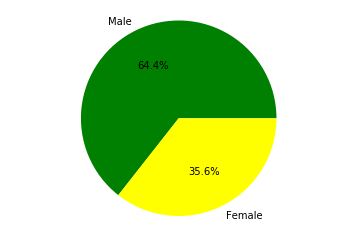

In [4]:

labels = 'Male', 'Female'
total = titanic['sex'].count()
m=titanic.loc[titanic['sex']=='male'].count()
f=titanic.loc[titanic['sex']=='female'].count()
sizes = [m.sex, f.sex]
sizes
colors = 'green', 'yellow'
# explode = (0.05, 0)
# plt.pie(sizes, explode= explode, labels=labels, colors=colors,
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=0)
 
plt.axis('equal')
plt.show()

In [51]:
# help(plt.scatter)

In [5]:
colors = {'male':'yellow', 'female':'green'}
y=titanic['sex'].iloc[:-1].apply(lambda x: colors[x])
a=titanic['fare'].iloc[:-1]
b=titanic['age'].iloc[:-1]

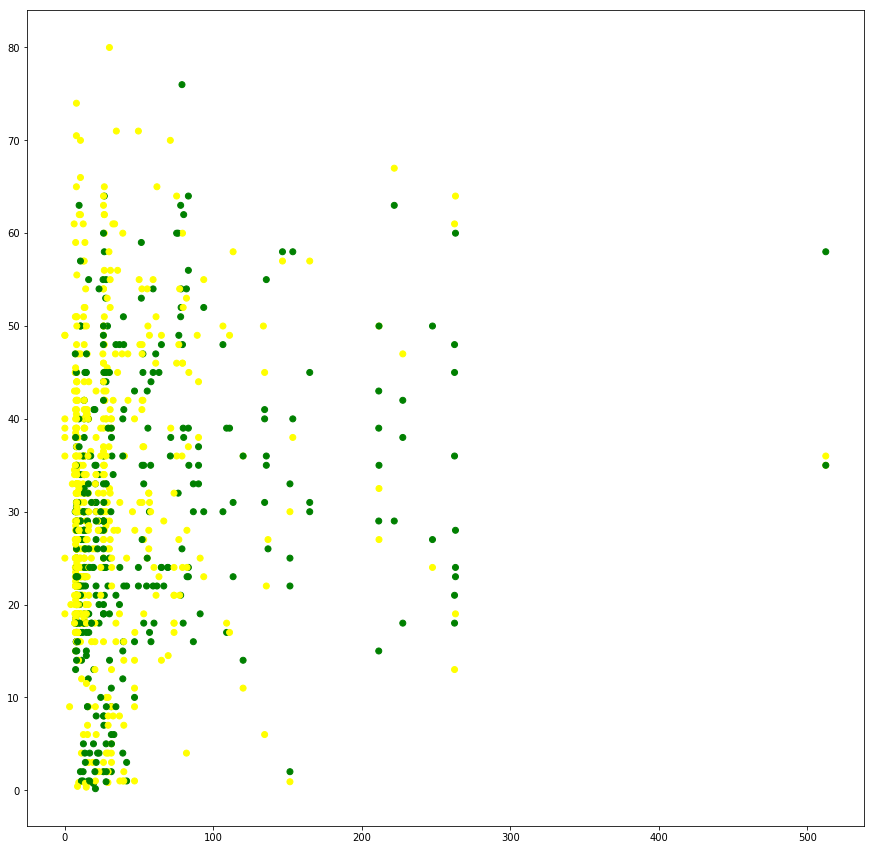

In [6]:
plt.figure(figsize = (15,15))
plt.scatter(a,b,c=y)
plt.show()

In [31]:
df = pd.DataFrame

In [76]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [77]:
# 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. 
# Fill in these missing numbers and make the column an integer column (instead of a float column).

df_missing_FN = df.copy()

for i in range(0,5):
    if df.FlightNumber[i] < 0 or i!=0:
        df.FlightNumber[i] = df.FlightNumber[i-1] + 10

df['FlightNumber'] = df['FlightNumber'].astype(int)
df.head()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
From_To         5 non-null object
FlightNumber    5 non-null int32
RecentDelays    5 non-null object
Airline         5 non-null object
dtypes: int32(1), object(3)
memory usage: 220.0+ bytes


In [79]:
# 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame 
# with the correct values. Assign the correct column names to this temporary DataFrame.

df1 = df.copy()
# df1 = pd.DataFrame(columns=['From','To'])
df1[['From','To']] = df['From_To'].str.split('_', expand=True)

# 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. 
# Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

df1['From'] = df1.From.str.capitalize()
df1['To'] = df1.To.str.capitalize()
df1.drop('From_To', axis=1, inplace = True)

# 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

df = df1
df.head()

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [80]:
import re
i=0
for mystr in df.Airline:
#     df.Airline[i] = re.sub('[^a-zA-Z0-9 \n]','', mystr )
    df.Airline[i] = df.Airline[i].translate({ord(c): '' for c in '!@#$%^&*()_+-=`~[]{}<>:;?/\".' })
    print(mystr, i, df.Airline[i])
    i=i+1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


KLM(!) 0 KLM
<Air France> (12) 1 Air France 12
(British Airways. ) 2 British Airways 
12. Air France 3 12 Air France
"Swiss Air" 4 Swiss Air


In [81]:
df.head()

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France 12,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],12 Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


In [82]:
# 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, 
# each second value in its own column, and so on. If  there isn't an Nth value, the value should be NaN.
# Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [83]:
df1= df['RecentDelays'].apply(pd.Series).add_prefix('delay_')
df1

,delay_0,delay_1,delay_2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [84]:
df = pd.concat([df, df1], axis=1, join="inner")
df.drop('RecentDelays', axis=1, inplace=True)
df.head()

,FlightNumber,Airline,From,To,delay_0,delay_1,delay_2
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France 12,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,12 Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN
